<a href="https://colab.research.google.com/github/anavarrete9/03MIAR---Algoritmos-de-Optimizacion-2022-2023/blob/main/Seminario_Algoritmos_optimizaci%C3%B3n_Amaia_Navarrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre y apellidos: Amaia Navarrete Muro <br>
Url: [https://colab.research.google.com/drive/1R0l0K9A1ph-4Kcz8sKgKojl4J2P0OUVb#scrollTo=oDni8LNDyK2I](https://colab.research.google.com/drive/1R0l0K9A1ph-4Kcz8sKgKojl4J2P0OUVb#scrollTo=oDni8LNDyK2I) <br>
Github: [https://github.com/anavarrete9/03MIAR---Algoritmos-de-Optimizacion-2022-2023](https://github.com/anavarrete9/03MIAR---Algoritmos-de-Optimizacion-2022-2023)

Problema:

  2. Organizar los partidos de La Liga

Descripción del problema:

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la audiencia.

Los horarios disponibles se conocen a priori y son los siguientes:<br>
Viernes 20h, Sábado 12h, Sábado 16h, Sábado 18h, Sábado 20h, Domingo 12h, Domingo 16h, Domingo 18h, Domingo, 20h, Lunes 20h.

En primer lugar se clasifican los equipos en tres categorías según el numero de
seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la
categoría A, 11 equipos de categoría B y 6 equipos de categoría C.

Se conoce estadísticamente la audiencia que genera cada partido según los equipos que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

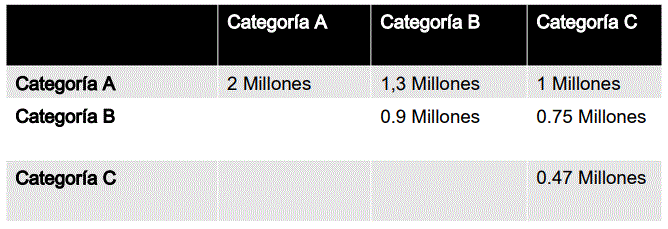

Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla

Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes

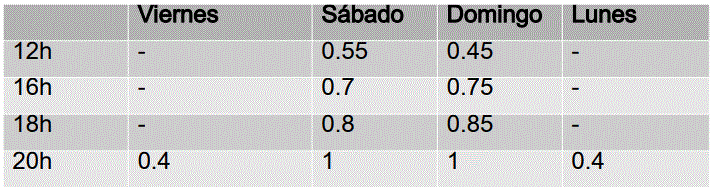

Es posible la coincidencia de horarios pero en este
caso la audiencia de cada partido se verá afectada y
se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de
coincidencias:

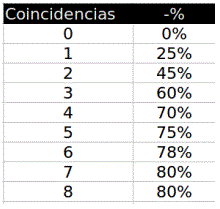

Los cálculos asociados a una jornada de ejemplo se realizan según se muestra en la siguiente tabla:

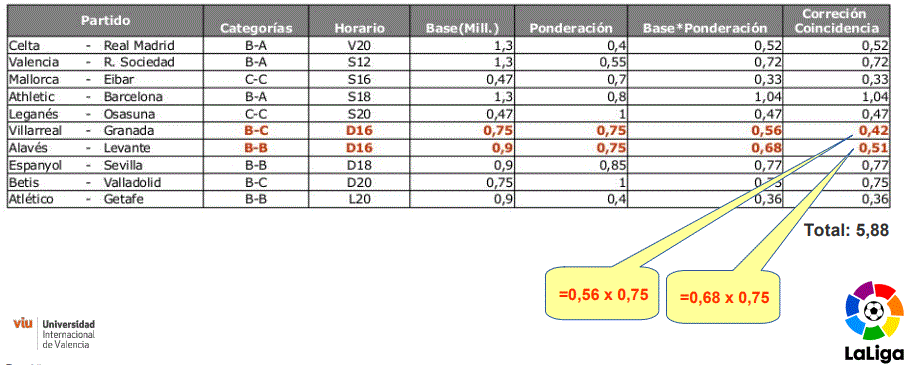


(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?

Sean $n$ el número de partidos a jugar y $m$ el número de posibles horarios en que jugarlos, las posibilidades sin restricciones son $m^n$.

Se trata de una variación con repetición.
Se aprecia fácilmente si consideramos una lista en la que cada posición corresponde a un partido y el valor de dicha posición es el horario en el que se va a jugar el partido. Entonces a cada una de esas $n$ posiciones (partidos) podemos asignarle $m$ valores (horarios) distintos, por lo que la solución es   $m \times ... (n \space veces) ... \times m$ = $m^n$ = $VR_m^n$. 

En nuestro caso, como tenemos $n = 10$ partidos a jugar y $m = 10$ posibles horarios, el número de posibilidades es $VR_{10}^{10} = 10^{10}$.

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguméntalo).

Al principio pensé en hacer una matriz en las que las filas representaran cada uno de los posibles horarios, y las columnas cada uno de los partidos (matriz $m \times n$). Los valores serían 0 si el partido no se jugaba en dicho horario y 1 en caso contrario. Cuando realicé el algoritmo todavía no habíamos visto en clase los Algoritmos Genéticos y cuando los explicaste pensé que mi tipo solución se podía parecer a ese problema.

Sin embargo, apliqué otro tipo de algoritmo y con esa estructura de datos el problema se complicaba bastante. Por lo tanto, finalmente opté por una lista donde:


*   Cada posición representa cada partido a jugar
*   El valor de cada posición representa el horario en el que se jugará dicho partido

De esta forma, la longitud de la lista será el número de partidos $n=10$ y los valores que pueden tomar sus elementos están en el conjunto $M = \{0,1,...,9\}$ tal que $m = |M| = 10$ es el número de posibles horarios. Dado que el orden tiene importancia, es importante tener en cuenta el orden de los partidos según la lista.


Según el modelo para el espacio de soluciones <br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?



Función objetivo: 

$h_0 c_0 X_0 + h_1 c_1 X_1 + ... + h_9 c_9 X_9$

donde

*   $X_i$ representa la audiencia del partido $i$ según la categoría de los dos equipos
*   $h_i$ es la ponderación según el horario del partido $i$
*   $c_i$ es el factor de corrección dependiendo del número de partidos con el que coincida el partido $i$


Se trata de un problema de maximización, ya que queremos obtener la máxima audiencia, maximizando el valor de la función objetivo, pese a las restricciones impuestas.

Diseña un algoritmo para resolver el problema por fuerza bruta.

No tiene sentido resolver este problema  por fuerza bruta porque la cantidad de posibles soluciones es demasiado grande y el tiempo de cómputo sería muy excesivo.

A continuación escribo una especie de pseudo-código

In [ ]:

def fuerza_bruta():
  soluciones=[]
  audiencia = []

  #Calculo todas las posibles soluciones y su audiencia (con una función que calcule su audiencia total)
  for i0 in range(10):
    for i1 in range(10):
      .
      .
      .
        ...for i9 in range(10):
            solucion = [i0, i1, i2, i3, i4, i5, i6, i7, i8, i9]
            if 0 in solucion and 9 in solucion:
                soluciones.append(solucion)
                audiencia.append(audiencia_total(solucion))

  #Hallo la posición de la solución con mayor audiencia
  posicion = np.argmax(audiencia)
  
  return soluciones[posicion]

Calcula la complejidad del algoritmo por fuerza bruta

El pseudo-código que he diseñado tiene una complejidad de $O(10^{10})$ en este caso, es decir, $O(m^n)$.


(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

In [ ]:
#DATOS PREVIOS

#Millones según la categoría
mill_cat =[
    [2, 1.3, 1],         #Categoría A (posición 0) con categorías A, B, C
    [1.3, 0.9, 0.75],    #Categoría B (posición 1) con categorías A, B, C
    [1, 0.75, 0.47]      #Categoría C (posición 2) con categorías A, B, C
]

#Millones según los partidos
partidos = ['Celta - Real Madrid', 'Valencia - R. Sociedad', 'Mallorca - Eibar', 'Athletic - Barcelona', 'Leganés - Osasuna', 'Villarreal - Granada',
            'Alavés - Levante', 'Espanyol - Sevilla', 'Betis - Valladolid', 'Atlético - Getafe']


#Factor a multiplicar por la audiencia según el horario
fact_horario = [0.4, 0.55, 0.7, 0.8, 1, 0.45, 0.75, 0.85, 1, 0.4]
#lista = [V 20h, S 12h, S 16h, S 18h, S 20h, D 12h, D 16h, D 18h, D 20h, L 20h]

#Reducción según la coincidencia de partidos
reduc_audiencia = [0, 0.25, 0.45, 0.6, 0.7, 0.75, 0.78, 0.8, 0.8, 0.8]  #Si coinciden 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 partidos

In [ ]:
#FUNCIONES AUXILIARES DE AUDIENCIA

#Reducción de audiencia según la coincidencia de partidos
#Ponderación
def correccion_coincidencia_partidos(reduc_audiencia):
  correccion_coincidencia = []
  for x in reduc_audiencia:
    correccion_coincidencia.append(1-x)
  return correccion_coincidencia

#Clasificación de los equipos de cada partido según su categoría
#Categorías de los partidos
# 0 = cat A, 1 = cat B, 2 = cat C

def clasificacion_cat_equipos(partidos):
  partidos_categoria = []
  for i in partidos:
    partido = i.split(' - ')
    lista = []
    for equipo in partido:
      if equipo in ['Real Madrid', 'R. Sociedad', 'Barcelona']:
        lista.append(0)
      elif equipo in ['Celta', 'Valencia', 'Athletic', 'Villarreal', 'Alavés', 'Levante', 'Espanyol', 'Sevilla', 'Betis', 'Atlético', 'Getafe']:
        lista.append(1)
      elif equipo in ['Mallorca', 'Eibar', 'Leganés', 'Osasuna', 'Granada', 'Valladolid']:
        lista.append(2)
      else:
        return 'Hay un equipo que no está en esta liga'
    partidos_categoria.append(lista)
  return partidos_categoria


#Asignación de los millones de audiencia según las categorías de los equipos

def audiencia_segun_categoria(partidos_categoria, millones_categoria):
  n = len(partidos_categoria)
  millones = []
  for i in range(n):
    millones.append(millones_categoria[partidos_categoria[i][0]][partidos_categoria[i][1]])
  return millones



#Dada una solución, ponderación de los millones de audiencia según el horario de cada partido (sin tener en cuenta coincidencias de horario)

def audiencia_ponderacion(solucion, base_millones, ponderacion):
  #solución = lista en la que se indica el horario para cada partido
  #base_millones = los millones de audiencia según la categoría de los equipos
  #ponderación = fact_horario, que es la ponderación de la audiencia según el horario de cada partido

  n = len(solucion)
  millones_ponderados = [base_millones[i] * ponderacion[solucion[i]] for i in range(n)]
  return millones_ponderados



#Cálculo final de la audiencia, teniendo en cuenta las coincidencias de los partidos
#Utilizo la funciones anteriores

def audiencia_total(solucion, base_millones, ponderacion, correccion_coincidencia):
  #solución = solución propuesta
  #partidos_categoria = categorías de los equipos de cada partido (lista de listas - matriz)
  #millones_categoría = millones de audiencia según las categorías de los equipos (matriz)
  #ponderación = fact_horario, que es la ponderación de la audiencia según el horario de cada partido
  #conrreccion_coincidencia = lista con las ponderaciones según la coincidencia de 0, 1, 2, 3... partidos en el mismo horario

  #Utilizo las dos funciones anteriores
  # base_millones = audiencia_segun_categoria(partidos_categoria, millones_categoria)
  audiencia_ponderada = audiencia_ponderacion(solucion, base_millones, ponderacion)

  audiencia = 0
  n = len(solucion)     #Número de partidos a jugar
  m = len(ponderacion)  #Número de posibles horarios para los partidos

  #En cada iteración (posible horario) creo una lista, llamada 'partidos_coincidentes', de los partidos que se juegan en ese horario 
  #Los elementos de 'partidos_coincidentes' son las posiciones, en la lista 'solucion', de los partidos que se juegan 
  #en el horario de dicha iteración
  for i in range(m):
    partidos_coincidentes = []
    for j in range(n):
      if solucion[j] == i:
        partidos_coincidentes.append(j)
    l = len(partidos_coincidentes)
    for k in range(l):
      audiencia += correccion_coincidencia[l-1] * audiencia_ponderada[partidos_coincidentes[k]]
  return audiencia

In [ ]:
#FUNCIONES DE RESTRICCIONES Y SOLUCIONES ALEATORIAS INICIALES
import random

#Restricciones:
  #Al menos un partido en el primer horario (Viernes 20h) -> valor 0
  #Al menos un partido en el último horario (Lunes 20h) -> valor 9

def solucion_restricciones(solucion, n):
  #n = número de partidos que se van a jugar
  #m = número de posibles horarios
  #Evaluación del partido del Viernes 20h
  #Si no se juega ningún partido en ese horario escojo un partido al azar para ese horario
  if 0 not in solucion:
    posicion0 = random.randrange(0,n)   
    solucion[posicion0] = 0

  else: 
    #Hallo el primer partido de la lista 'partidos' que se juega el Viernes 20h
    for i in range(n): 
      if solucion[i] == 0:
        posicion0 = i
        break

  #Evaluación del partido del Lunes 20h
  if 9 not in solucion:
    posicion9 = random.randrange(0, n)
    #Asigno un partido random para jugar el Lunes 20h, pero que no coincida con el partido del Viernes 20h
    while posicion9 == posicion0:
      posicion9 = random.randrange(0, n)
    solucion[posicion9] = 9
  return solucion



#Creación de solución aleatoria cumpliendo las restricciones
def solucion_aleatoria(numero_partidos, numero_horarios):
  solucion = [random.randrange(0,numero_horarios) for i in range(numero_partidos)]
  solucion = solucion_restricciones(solucion, numero_partidos)
  return solucion

In [ ]:
#FUNCIONES AUXILIARES - RECOCIDO SIMULADO
#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

    

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99



#Generación de una solución vecina aleatoria mediante el intercambio de horario de dos partidos
#No hace falta evaluar si se cumplen las restricciones, porque si ya se cumplen en la solucion original, en la nueva generada también se cumplirán
def genera_vecina_aleatorio(solucion):
  #Se eligen dos partidos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

In [ ]:
#RECOCIDO SIMULADO
import math

def recocido_simulado(partidos, millones_categoria, ponderacion, reduc_audiencia, TEMPERATURA ):
  #TEMPERATURA = Temperatura
  n = len(partidos)
  m = len(ponderacion)
  correccion_coincidencia = correccion_coincidencia_partidos(reduc_audiencia)
  partidos_categoria = clasificacion_cat_equipos(partidos)
  base_millones = audiencia_segun_categoria(partidos_categoria, millones_categoria)
  solucion_referencia = solucion_aleatoria(n,m)
  audiencia_referencia = audiencia_total(solucion_referencia, base_millones, ponderacion, correccion_coincidencia)
  
  mejor_solucion = []         #x* del pseudocódigo
  mejor_audiencia = 0    #F* del pseudocódigo
  
  
  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)
    
    #Calcula su valor (audiencia)
    audiencia_vecina =audiencia_total(vecina, base_millones, ponderacion, correccion_coincidencia)
      
    #Si es la mejor solución de todas se guarda
    if audiencia_vecina > mejor_audiencia:
        mejor_solucion = vecina
        mejor_audiencia = audiencia_vecina
    
    #Si la nueva vecina es mejor se cambia  
    #Si es peor se cambia según una probabilidad que depende de 'TEMPERATURA' y delta(audiencia_referencia - audiencia_vecina)
    if audiencia_vecina > audiencia_referencia or probabilidad(TEMPERATURA, abs(audiencia_referencia - audiencia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = audiencia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)
 
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una audiencia total de " , end="")
  print(mejor_audiencia)
  return mejor_solucion

sol  = recocido_simulado(partidos, mill_cat, fact_horario, reduc_audiencia, 10000000)


#Función para visualizar el horario de los partidos por orden temporal
def traduccion_solucion(solucion, partidos):
  #partidos = lista original con los nombres de los equipos en cada partido
  lectura = ['Viernes 20h', 'Sábado 12h', 'Sábado 16h', 'Sábado 18h', 'Sábado 20h', 'Domingo 12h', 'Domingo 16h', 'Domingo 18h',
             'Domingo 20h', 'Lunes 20h']
  print('\n\n')
  for i in range(len(partidos)):
    for j in range(len(solucion)):
      if solucion[j] == i:
        print(partidos[j], '->', lectura[solucion[j]])
  return

traduccion_solucion(sol, partidos)

La mejor solución encontrada es [3, 4, 2, 7, 2, 0, 6, 9, 2, 6]
con una audiencia total de 5.768150000000001



Villarreal - Granada -> Viernes 20h
Mallorca - Eibar -> Sábado 16h
Leganés - Osasuna -> Sábado 16h
Betis - Valladolid -> Sábado 16h
Celta - Real Madrid -> Sábado 18h
Valencia - R. Sociedad -> Sábado 20h
Alavés - Levante -> Domingo 16h
Atlético - Getafe -> Domingo 16h
Athletic - Barcelona -> Domingo 18h
Espanyol - Sevilla -> Lunes 20h


Con la técnica del multi-arranque, el máximo valor de aundiencia que he obtenido es 6.701 para la solución [4, 3, 9, 7, 0, 5, 8, 2, 6, 8], es decir, los partidos

*   Leganés - Osasuna -> Viernes 20h
*   Espanyol - Sevilla -> Sábado 16h
*   Valencia - R. Sociedad -> Sábado 18h
*   Celta - Real Madrid -> Sábado 20h
*   Villarreal - Granada -> Domingo 12h
*   Betis - Valladolid -> Domingo 16h
*   Athletic - Barcelona -> Domingo 18h
*   Alavés - Levante -> Domingo 20h
*   Atlético - Getafe -> Domingo 20h
*   Mallorca - Eibar -> Lunes 20h

Mejora la complejidad del algoritmos por fuerza bruta ya que no tiene que calcular todas las soluciones posibles, el cual es un número desproporcionadamente algo. Además, la complejidad temporal del algoritmo simulado recocido es menor ya que su técnica consiste en diversificar (al principio) e intensificar (al final), reduciendo considerablemente el coste computacional.

(*)Calcula la complejidad del algoritmo

Sea n el número de partidos y m el número de posibles horarios en los que pueden tener lugar, veamos la complejidad de las funciones.

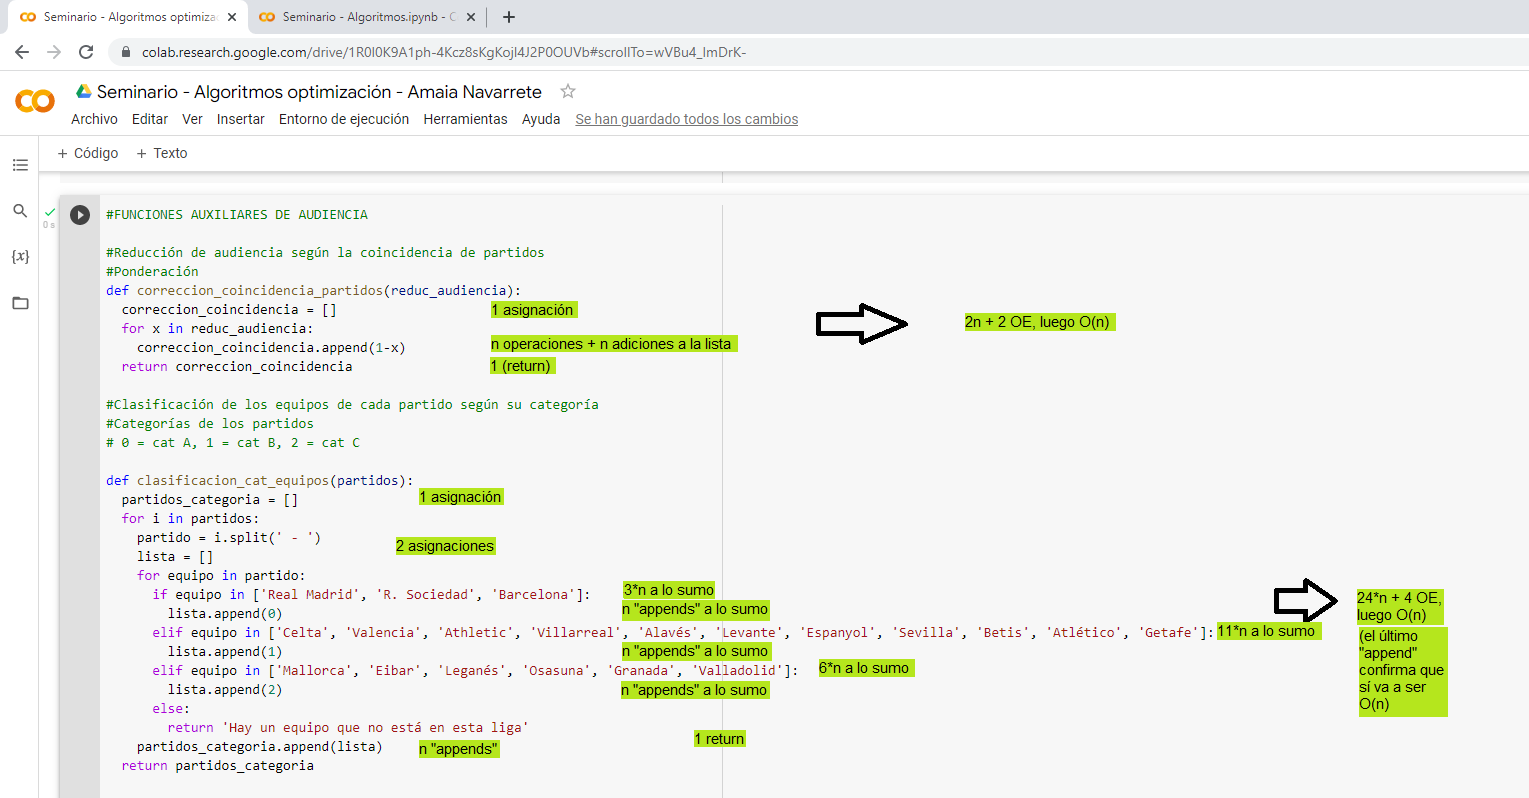

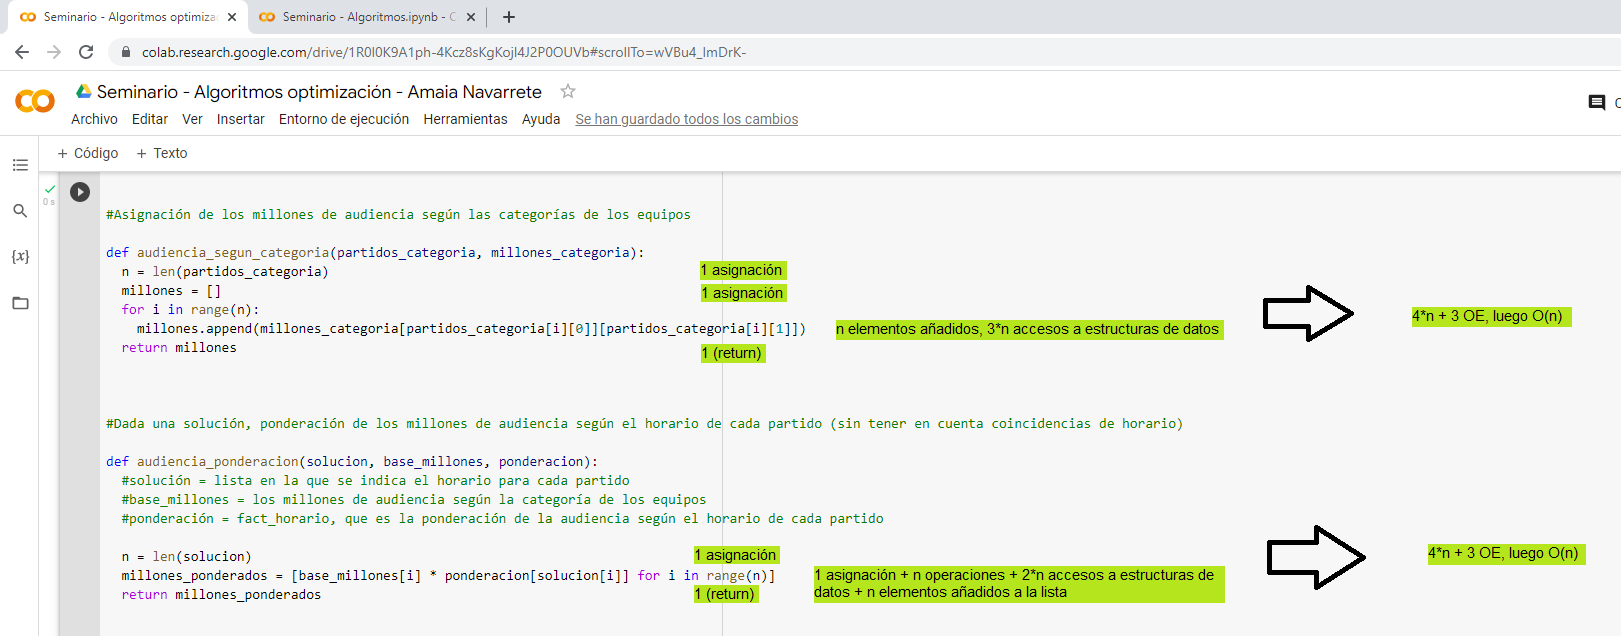

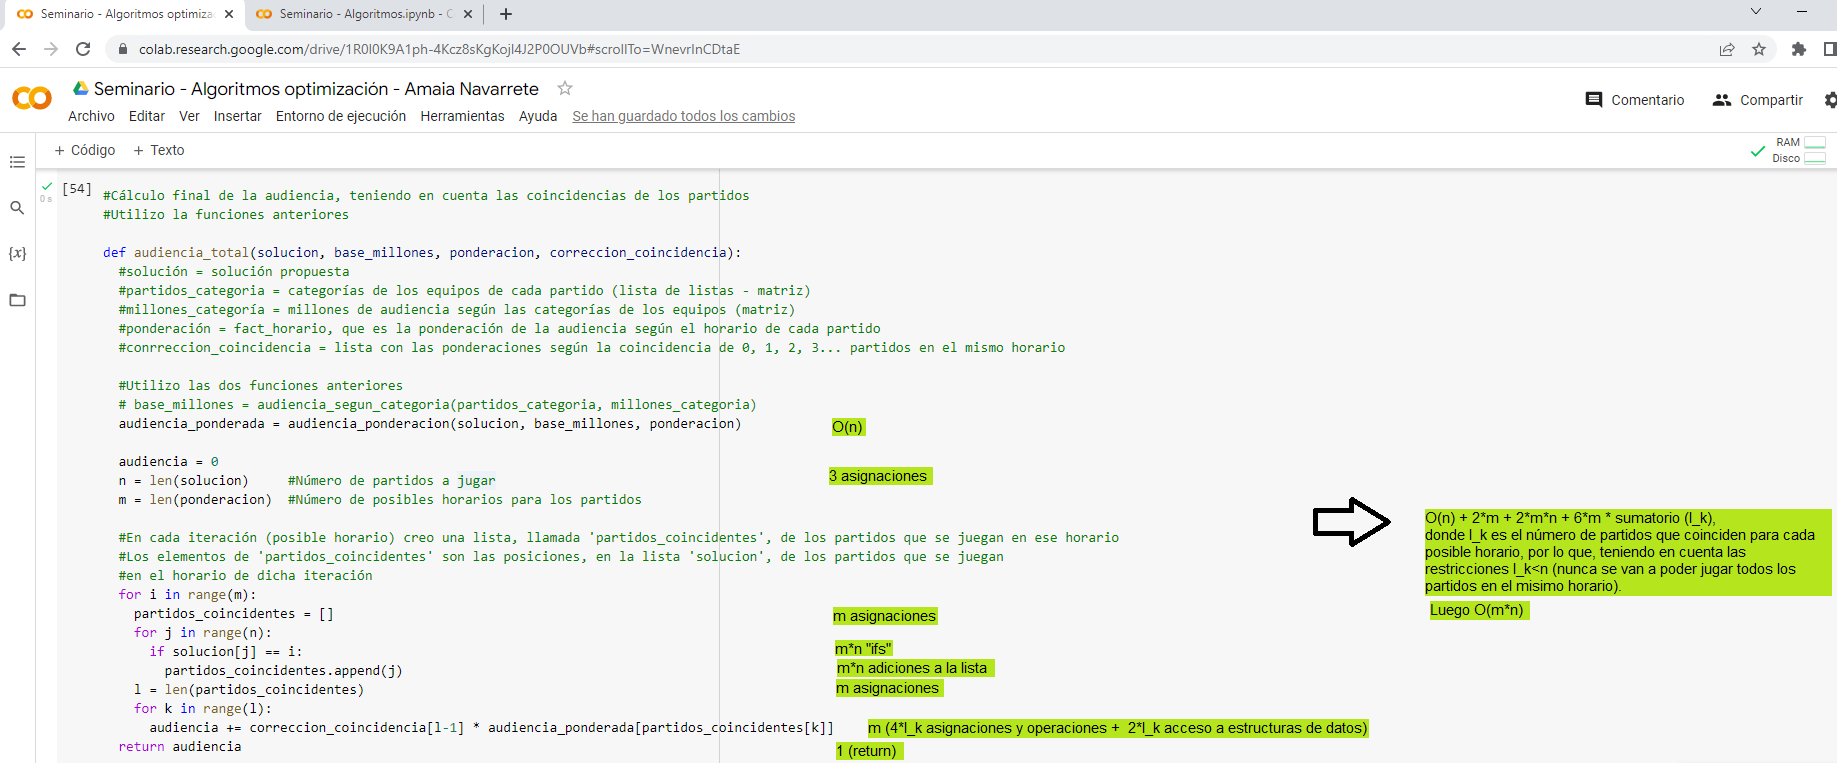

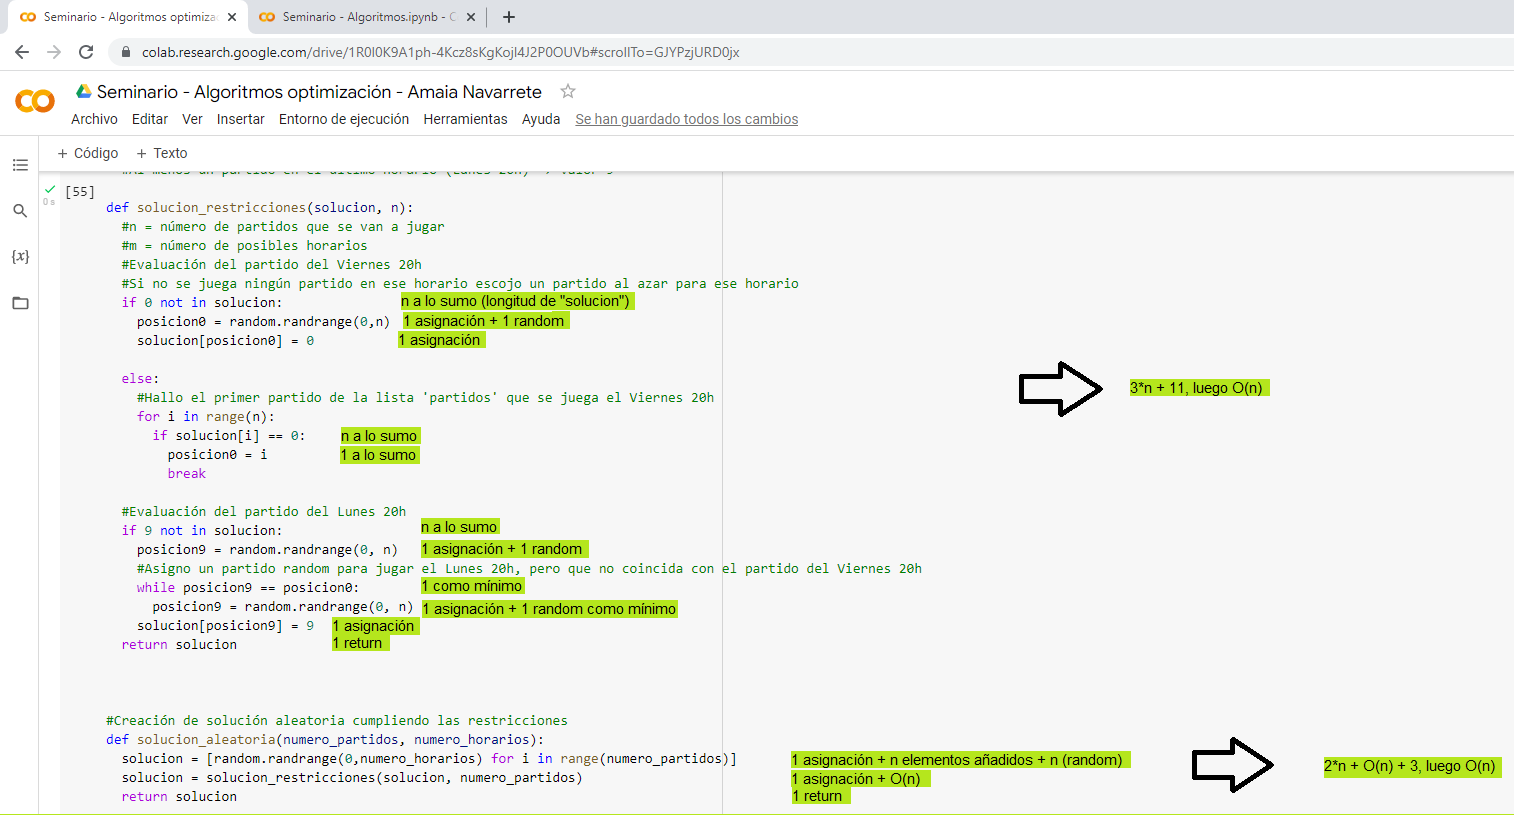

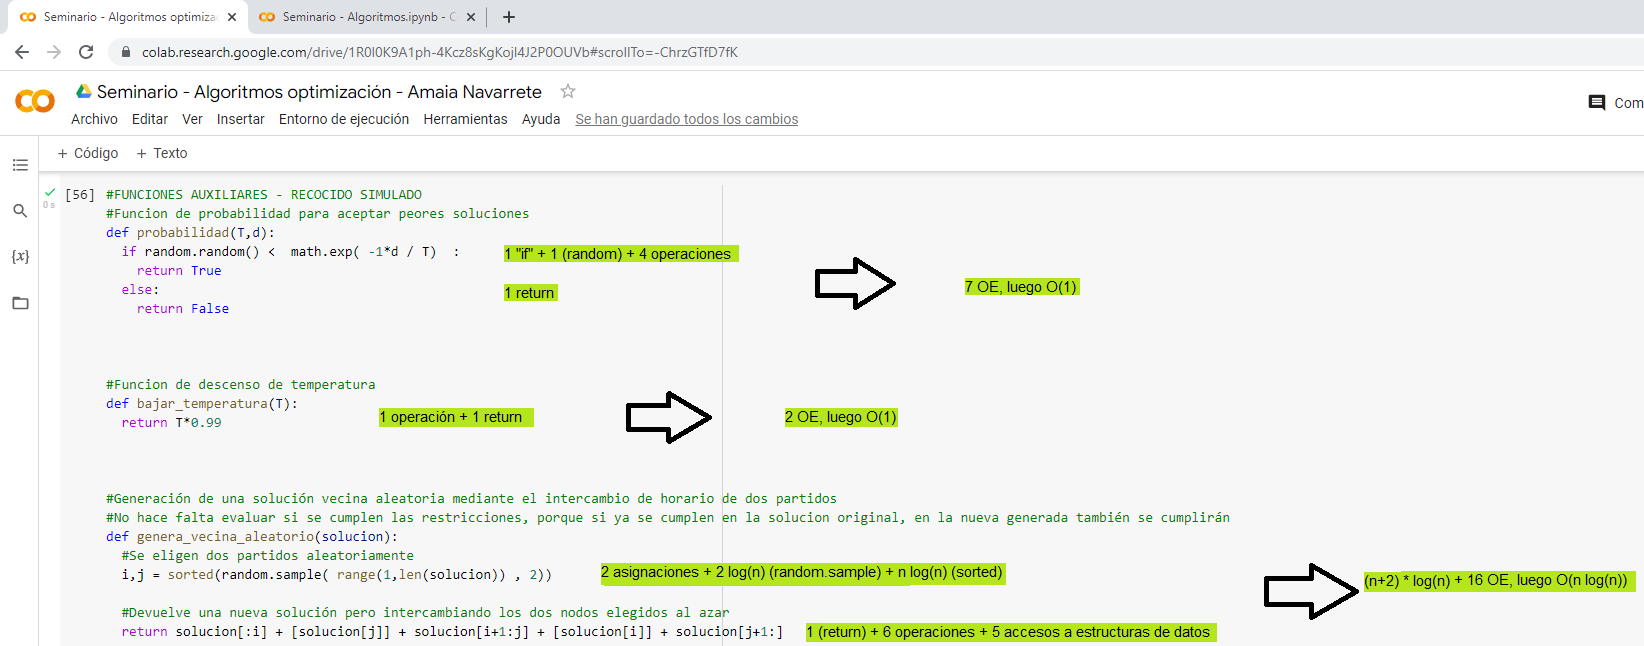

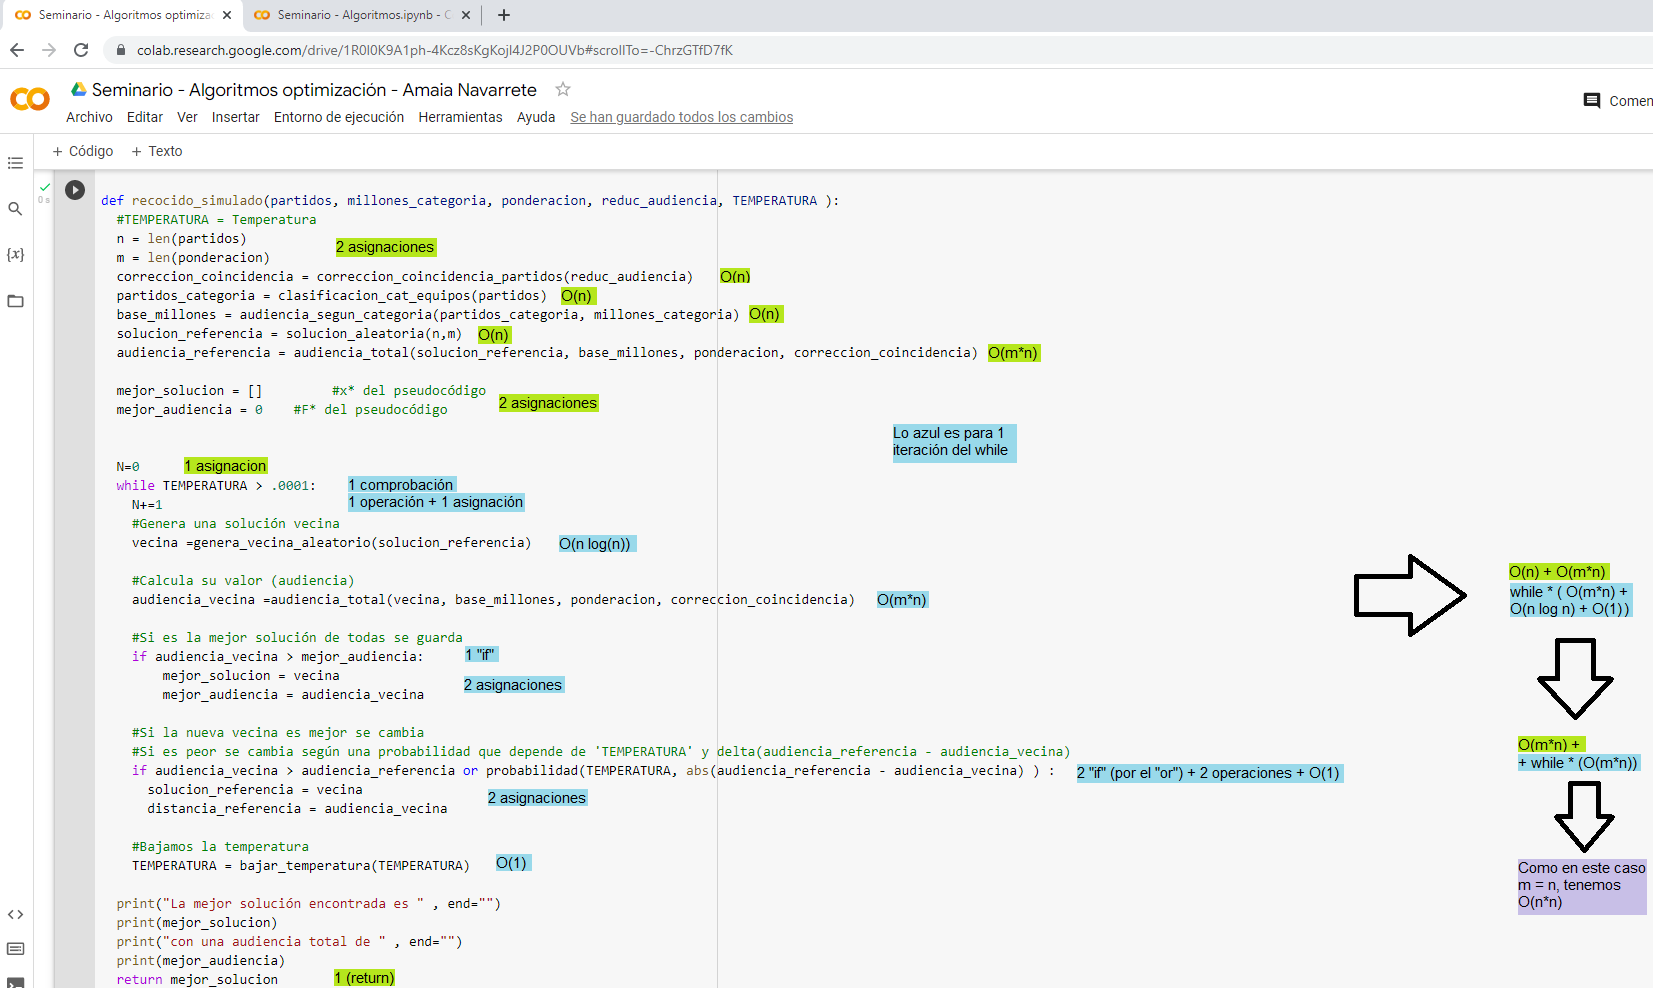

Como observamos, finalmente se obtiene $O(n^2)$.

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

In [ ]:
import random
def datos_aleatorios(equipos):
  partidos = []
  n = len(equipos)
  posiciones = list(range(n))
  for i in range(int(n/2)):
    string = ''
    j = random.randrange(0, len(posiciones))
    string += equipos[posiciones[j]] + ' - '
    del(posiciones[j])
    k = random.randrange(0, len(posiciones))
    string += equipos[posiciones[k]]
    del(posiciones[k])
    partidos.append(string)
  return partidos

In [ ]:
nuevos_datos = datos_aleatorios(['Celta','Real Madrid', 'Valencia','R. Sociedad', 'Mallorca','Eibar', 'Athletic','Barcelona', 'Leganés','Osasuna', 'Villarreal','Granada','Alavés','Levante', 'Espanyol','Sevilla', 'Betis','Valladolid', 'Atlético','Getafe'])
print(nuevos_datos)

['Espanyol - Levante', 'Alavés - Atlético', 'Granada - Eibar', 'Barcelona - Athletic', 'R. Sociedad - Mallorca', 'Betis - Villarreal', 'Valencia - Celta', 'Leganés - Valladolid', 'Real Madrid - Getafe', 'Sevilla - Osasuna']


Aplica el algoritmo al juego de datos generado

In [ ]:
nueva_solucion = recocido_simulado(nuevos_datos, mill_cat, fact_horario, correccion_coincidencia, 10000000)

La mejor solución encontrada es [1, 9, 2, 7, 6, 1, 0, 2, 8, 2]
con una audiencia total de 5.26815


In [ ]:
traduccion_solucion(nueva_solucion, nuevos_datos)




Valencia - Celta -> Viernes 20h
Espanyol - Levante -> Sábado 12h
Betis - Villarreal -> Sábado 12h
Granada - Eibar -> Sábado 16h
Leganés - Valladolid -> Sábado 16h
Sevilla - Osasuna -> Sábado 16h
R. Sociedad - Mallorca -> Domingo 16h
Barcelona - Athletic -> Domingo 18h
Real Madrid - Getafe -> Domingo 20h
Alavés - Atlético -> Lunes 20h


Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

-Complejidad de los diferentes random: [https://iq.opengenus.org/random-element-from-list-in-python/](https://iq.opengenus.org/random-element-from-list-in-python/)

-Complejidad random.sample() [https://stackoverflow.com/questions/10483377/time-complexity-of-random-sample](https://stackoverflow.com/questions/10483377/time-complexity-of-random-sample)

-Complejidad de sorted [https://stackoverflow.com/questions/14434490/what-is-the-complexity-of-the-sorted-function#:~:text=Just%20like%20in%20every%20other,O(NlogN)%20Time%20Complexity.](https://stackoverflow.com/questions/14434490/what-is-the-complexity-of-the-sorted-function#:~:text=Just%20like%20in%20every%20other,O(NlogN)%20Time%20Complexity.)

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Para mejorar el resultado obtenido, en lugar de generar soluciones vecinas aleatorias, se podría definir una función que generase soluciones vecinas más óptimas que lo que podría ser una aleatoria.